In [1]:
import pandas as pd
bollywood_df=pd.read_csv('bollywood.csv')
bollywood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [2]:
bollywood_df.Genre.value_counts()
gc=bollywood_df['Genre'].value_counts()
gc.idxmax()
gc.sort_values(ascending=False)

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

In [3]:
bollywood_df.Genre.value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

In [5]:
#bollywood_df.Genre.value_counts()
gc=bollywood_df['Genre'].value_counts()
print(gc)
a1=gc.idxmax()
print(a1)
a2=gc.sort_values(ascending=False)
print(a2)

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64
Comedy
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64


In [6]:
pd.crosstab(bollywood_df['Genre'],bollywood_df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


In [7]:
bollywood_df['month']=bollywood_df['SlNo'].month
mc=bollywood_df.month.value_counts()
a1=mc.idxmax()
print(a1)

AttributeError: 'Series' object has no attribute 'month'

In [8]:
bollywood_df['month']=bollywood_df['SlNo'].dt.month
mc=bollywood_df.month.value_counts()
a1=mc.idxmax()
print(a1)

AttributeError: Can only use .dt accessor with datetimelike values

In [10]:
bollywood_df['SlNo']=pd.to_datetime(bollywood_df['SlNo'])
bollywood_df['month']=bollywood_df['SlNo'].dt.month
mc=bollywood_df.month.value_counts()
print(mc)
a1=mc.idxmax()
print(a1)

1    149
Name: month, dtype: int64
1


In [11]:
bollywood_df['ROI']=bollywood_df['BoxOfficeCollection']-bollywood_df['Budget']
bollywood_df[['ROI']].sort_values('ROI',ascending=False)[0:10]

,ROI
89,650.0
115,320.0
43,277.0
132,263.0
26,258.0
82,241.0
92,200.0
119,185.0
101,134.0
37,110.0


In [12]:
avg_ROI=bollywood_df.groupby('ReleaseTime')['ROI'].mean().reset_index()
print(avg_ROI)

  ReleaseTime        ROI
0          FS  48.888235
1          HS  45.897222
2          LW  51.922000
3           N  14.862020


(array([64., 40., 19., 11.,  4.,  4.,  2.,  2.,  1.,  2.]),
 array([  2. ,  16.8,  31.6,  46.4,  61.2,  76. ,  90.8, 105.6, 120.4,
        135.2, 150. ]),
 <BarContainer object of 10 artists>)

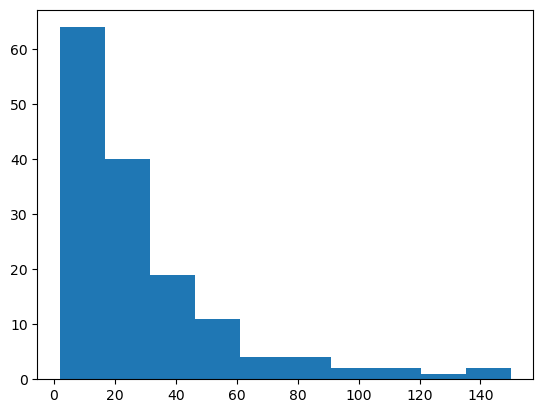

In [13]:
import matplotlib.pyplot as plt
plt.hist(bollywood_df['Budget'])

C:\Users\HP\AppData\Local\Temp\ipykernel_9896\3155931555.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(bollywood_df['Budget'])


<Axes: xlabel='Budget', ylabel='Density'>

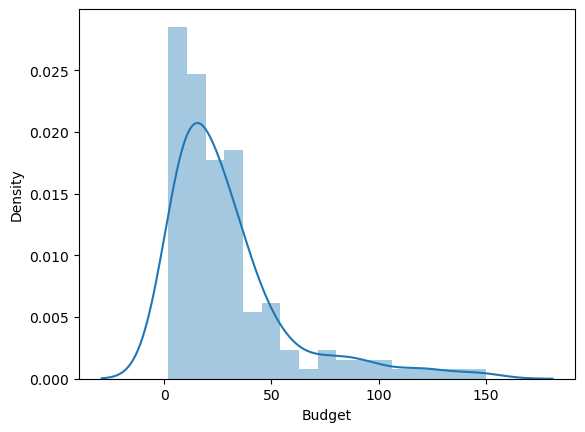

In [15]:
import seaborn as sn
sn.distplot(bollywood_df['Budget'])

<Axes: xlabel='ROI', ylabel='Count'>

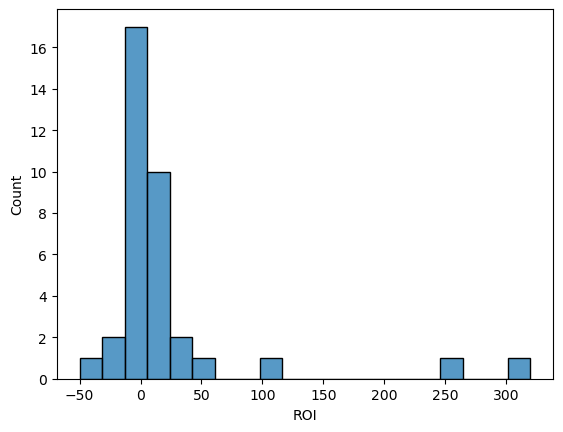

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
comedy_movies = bollywood_df[bollywood_df['Genre'] == 'Comedy']
drama_movies = bollywood_df[bollywood_df['Genre'] == 'Drama']
sn.histplot(data=comedy_movies, x='ROI', bins=20, label='Comedy', kde=False)
sn.histplot(data=drama_movies, x='ROI', bins=20, label='Drama', kde=False)

In [19]:
bollywood_df[['BoxOfficeCollection', 'YoutubeLikes']].corr()

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


<Axes: >

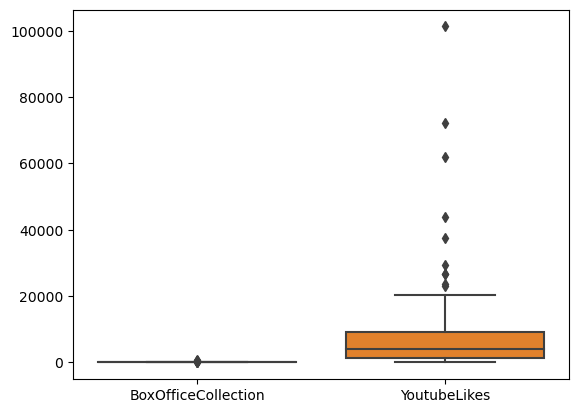

In [20]:
sn.boxplot(bollywood_df[['BoxOfficeCollection', 'YoutubeLikes']])